In [2]:
# Importing necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [3]:
application_df = pd.read_csv("walmart_cleaned.csv")
application_df.head()
# Group the data by Store
grouped_data = application_df.groupby('Store')

# Create a dictionary to store data for each store
store_data = {}

# Loop through each store and store the data in the dictionary
for store_number, data in grouped_data:
    store_data[store_number] = data.drop(['Store', 'Date'], axis=1)

In [4]:
#Perform Principal Component Analysis for each store on the feature variables.

In [5]:
from sklearn.decomposition import PCA

# Create a dictionary to store PCA results for each store
pca_results = {}

# Loop through each store and apply PCA
for store_number, data in store_data.items():
    # Separate features (X) and target (y)
    X = data.drop('Weekly_Sales', axis=1)
    y = data['Weekly_Sales']

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA
    pca = PCA(n_components=2)  # Choose the number of components you want to keep
    principal_components = pca.fit_transform(X_scaled)

    # Store PCA results in the dictionary
    pca_results[store_number] = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_results[store_number]['Weekly_Sales'] = y.values


In [ ]:
#PCA on the data for all 45 stores, and we have the first two principal components and the corresponding weekly sales for each store.

In [ ]:
#Correlation Heatmap: Created a correlation heatmap to visualize the correlations between the original features. This helps understand which features have the most influence on the principal components and how they relate to each other.

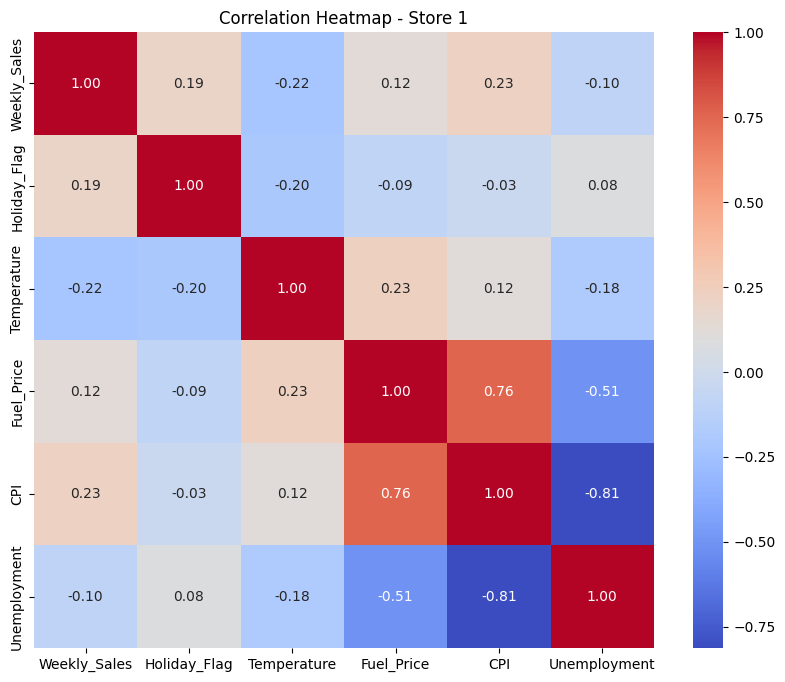

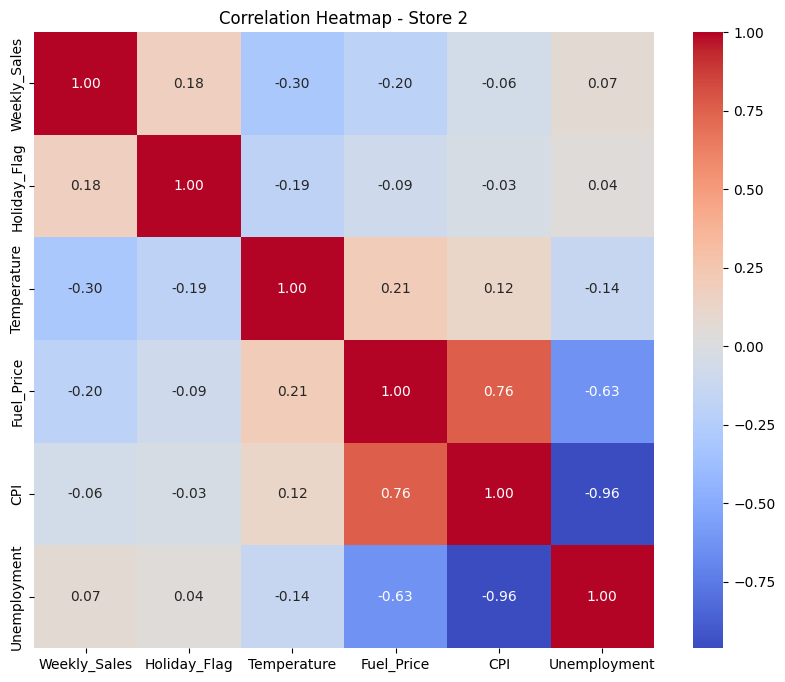

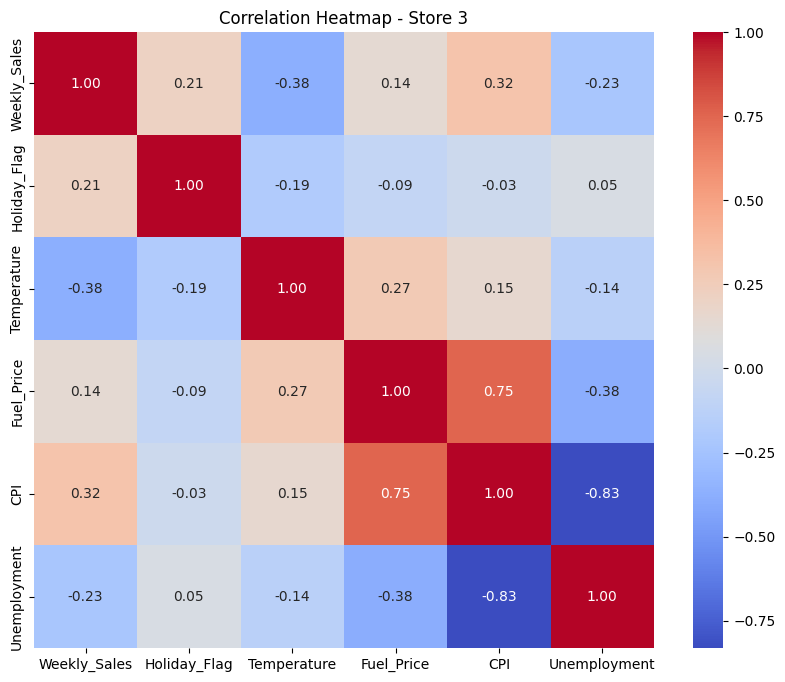

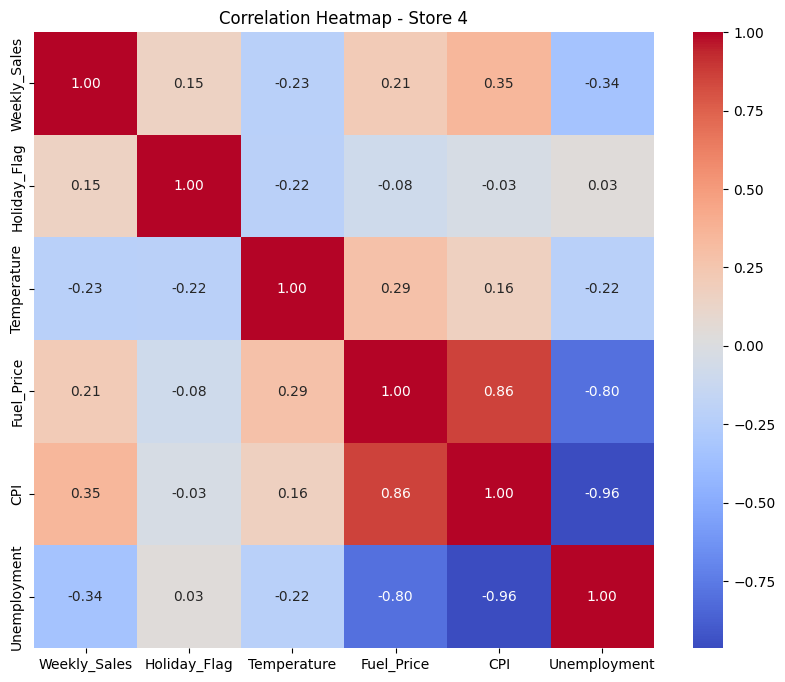

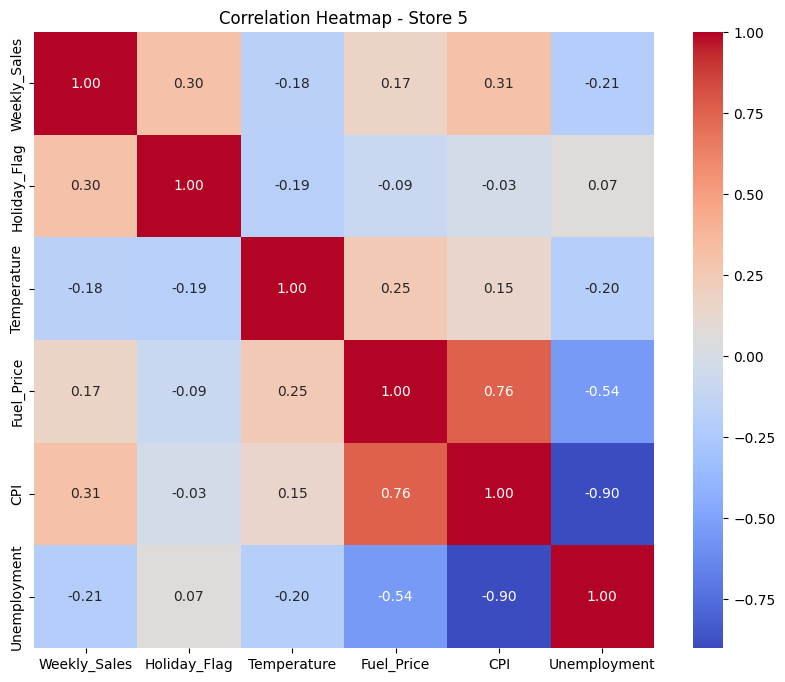

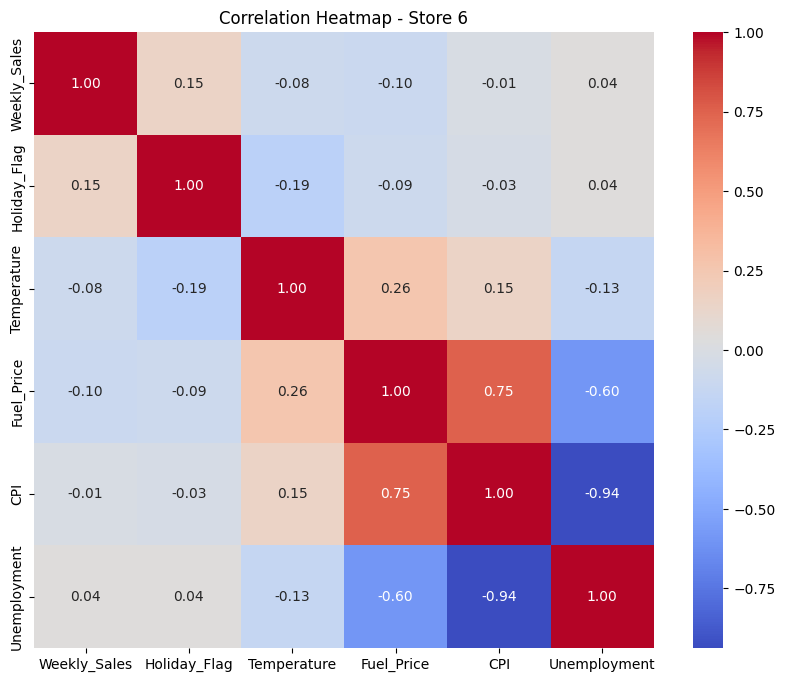

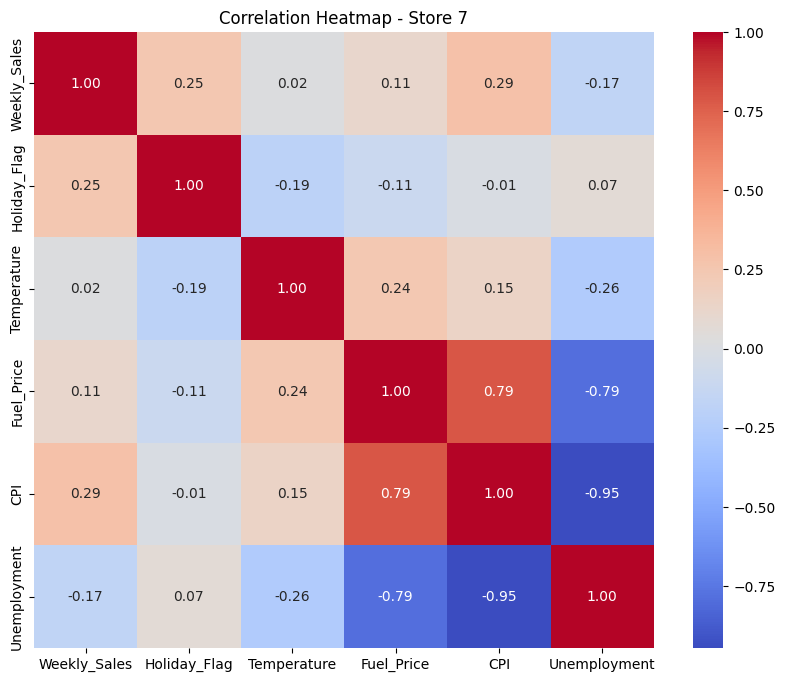

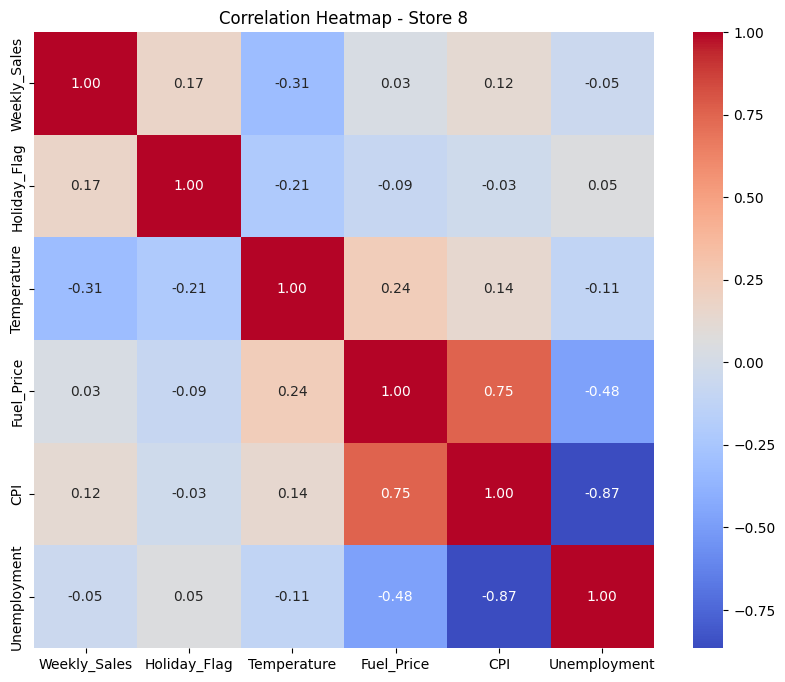

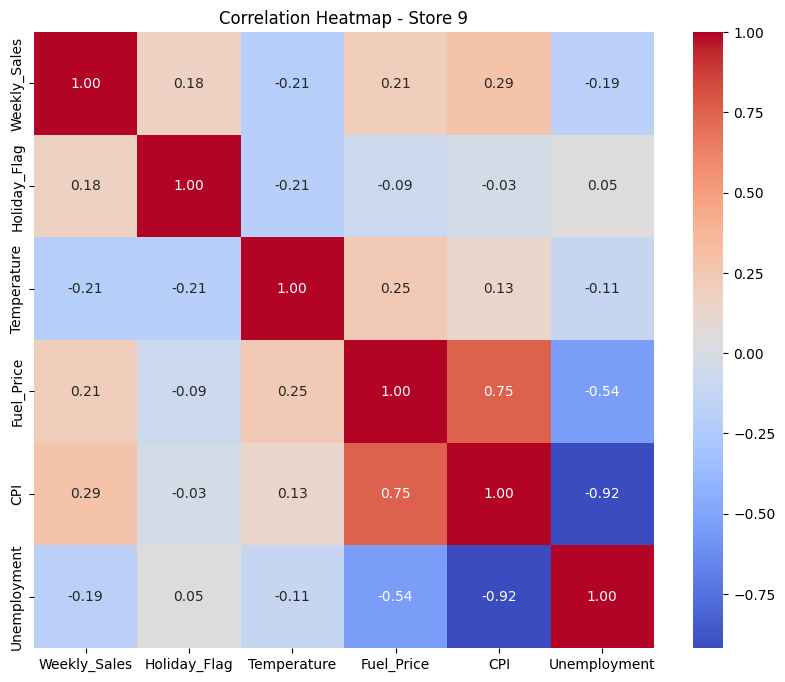

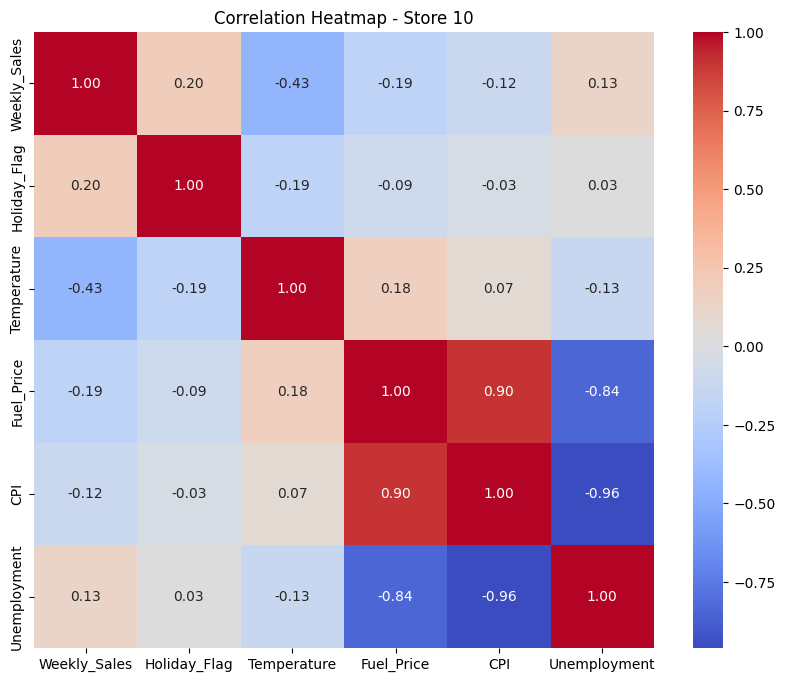

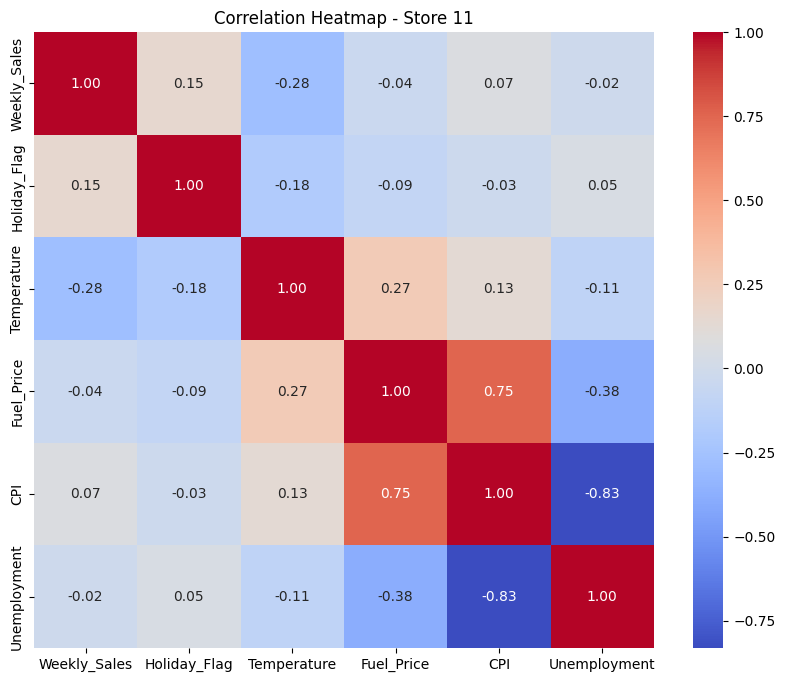

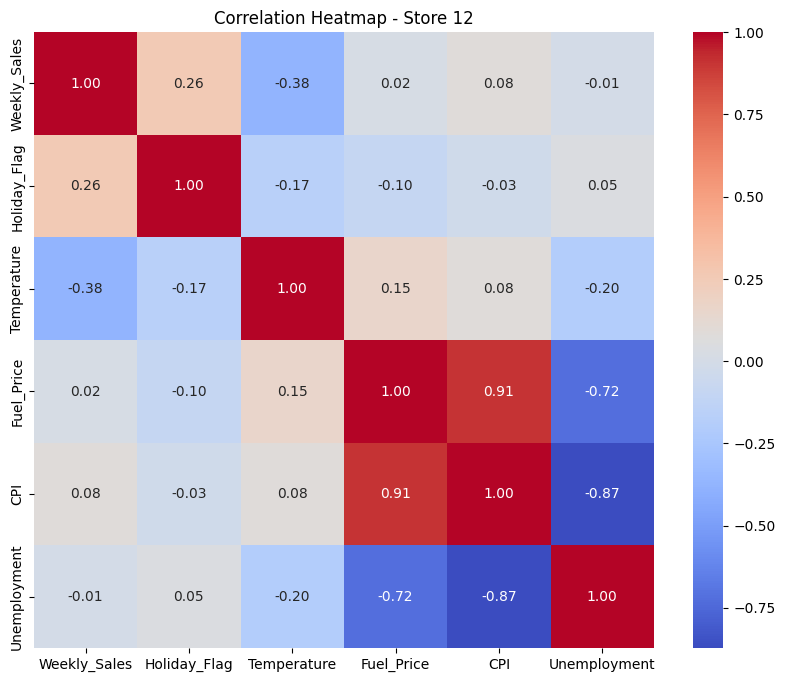

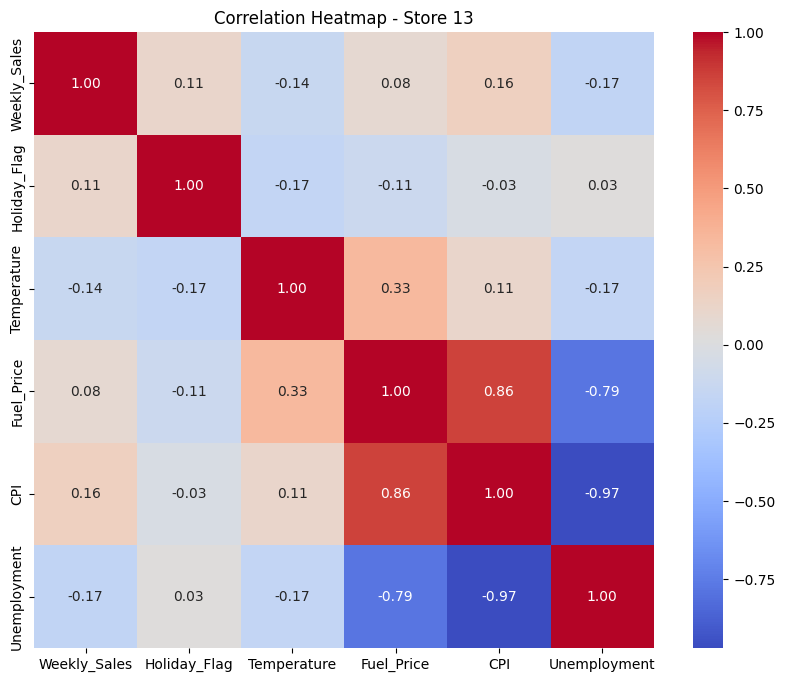

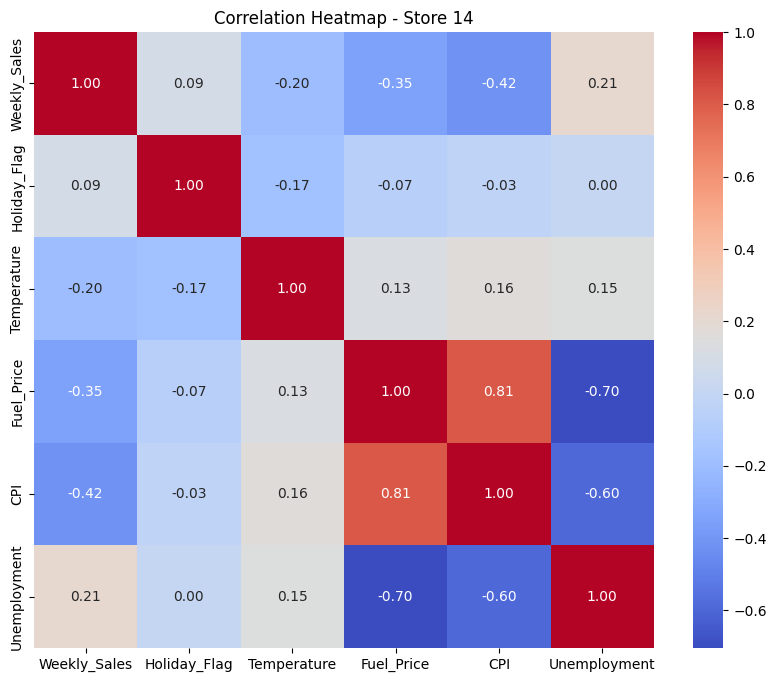

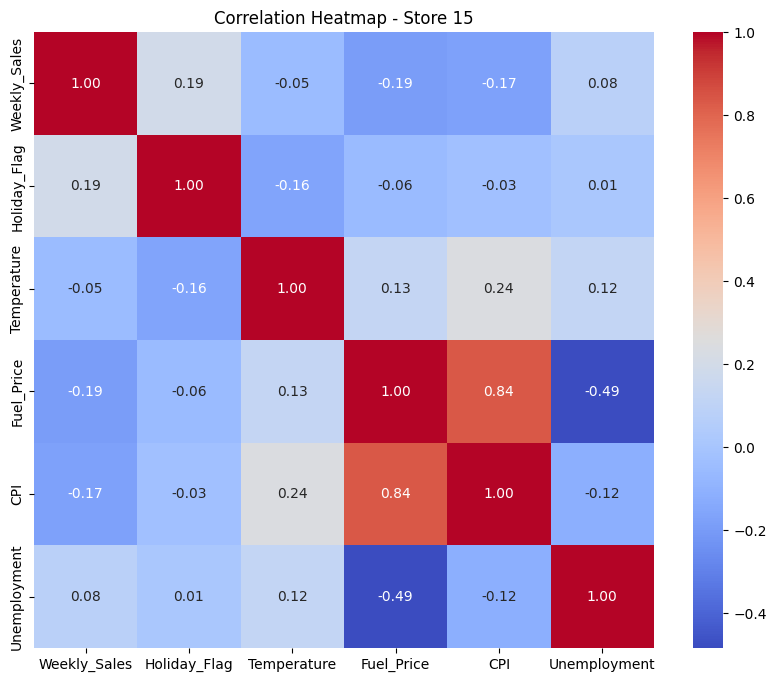

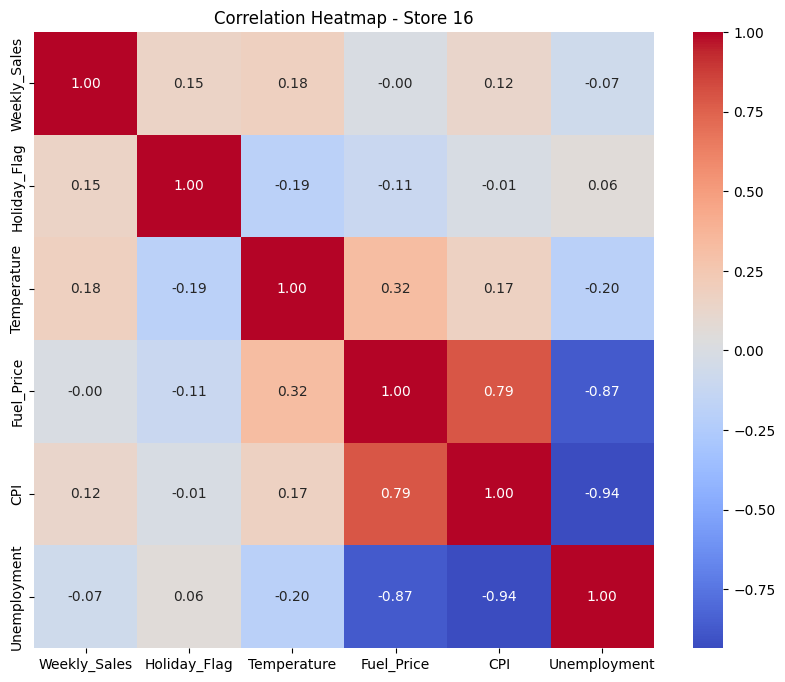

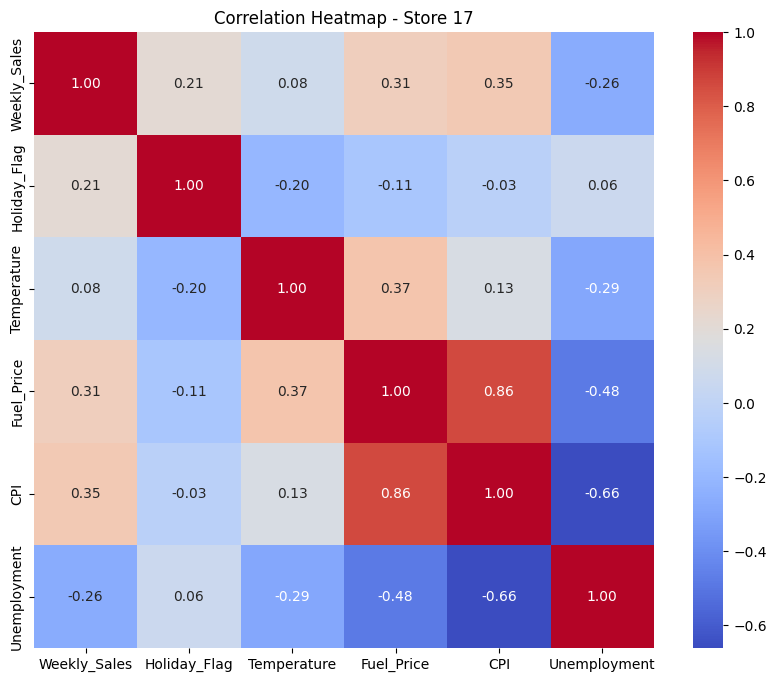

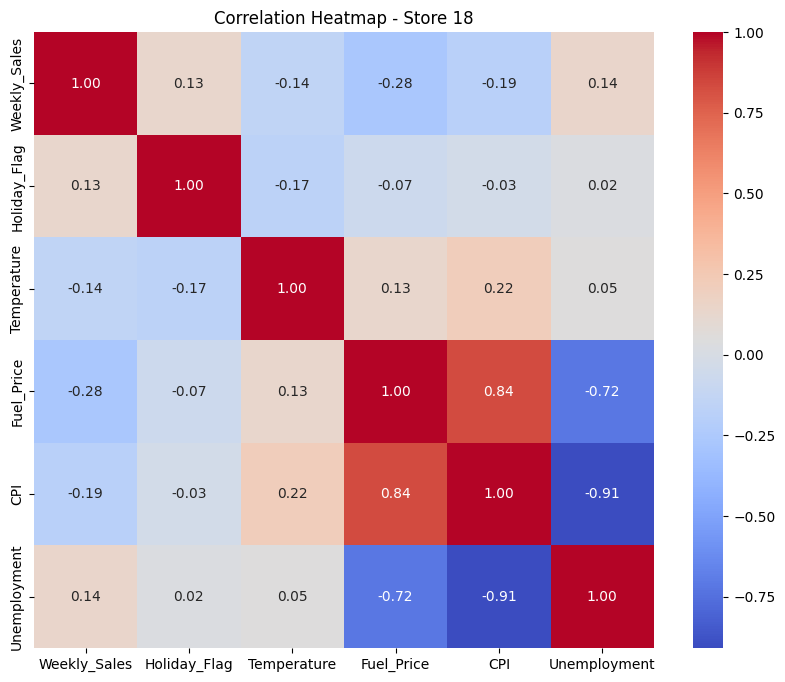

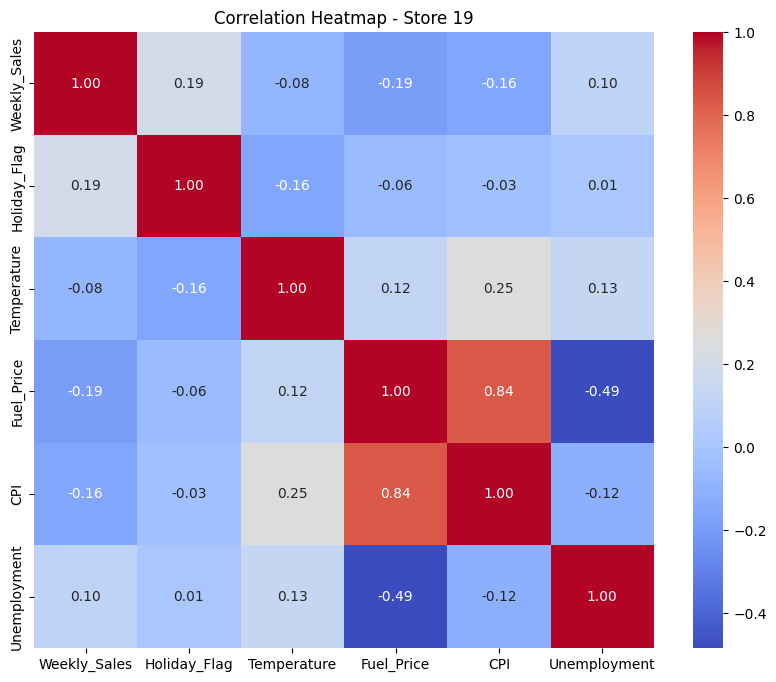

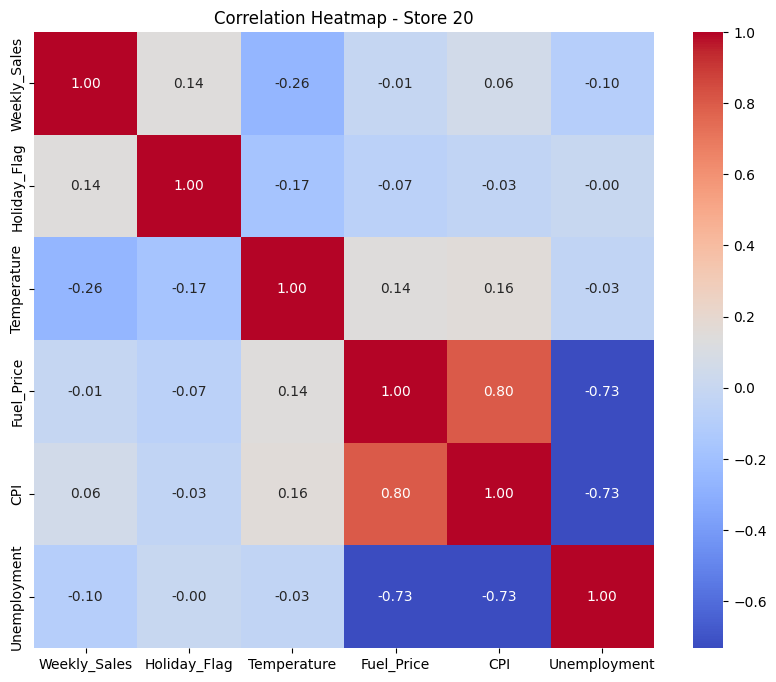

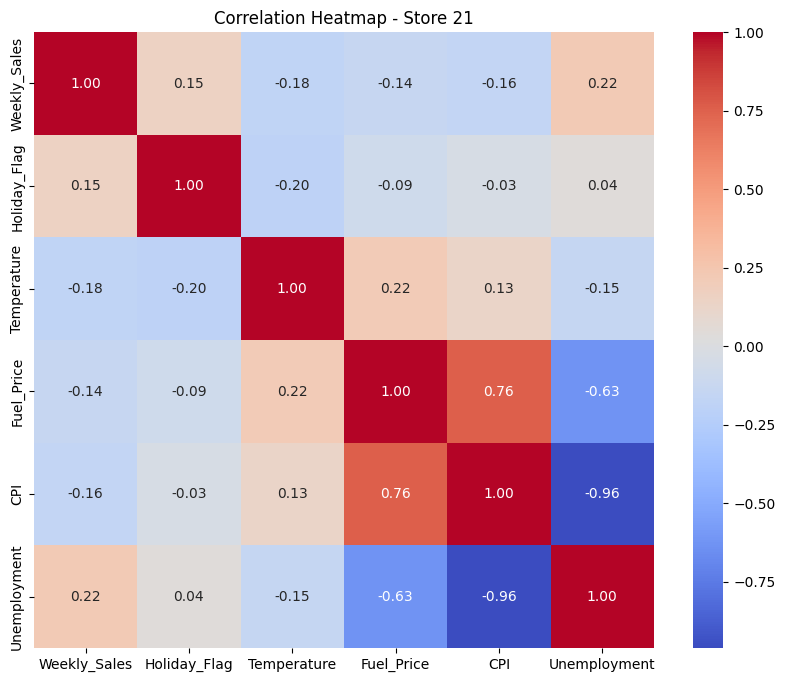

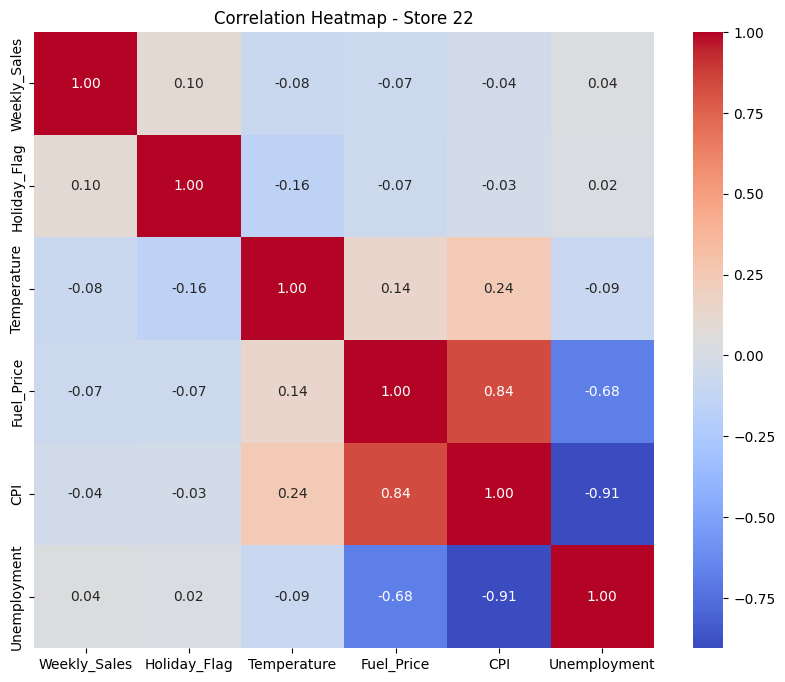

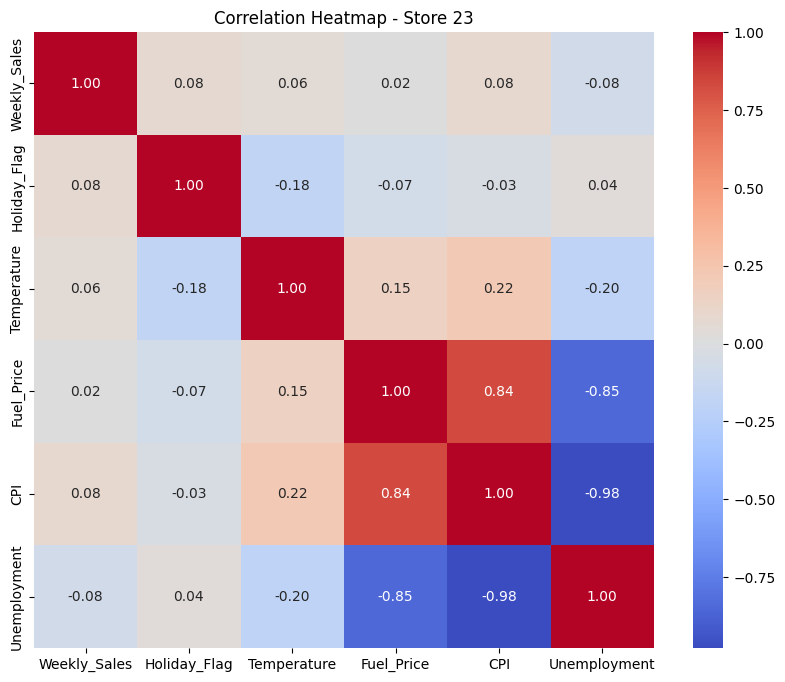

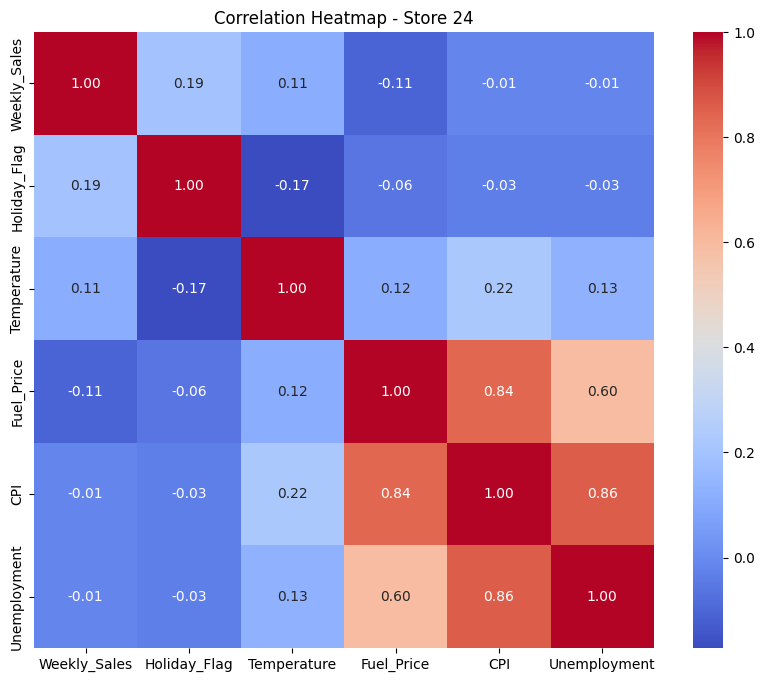

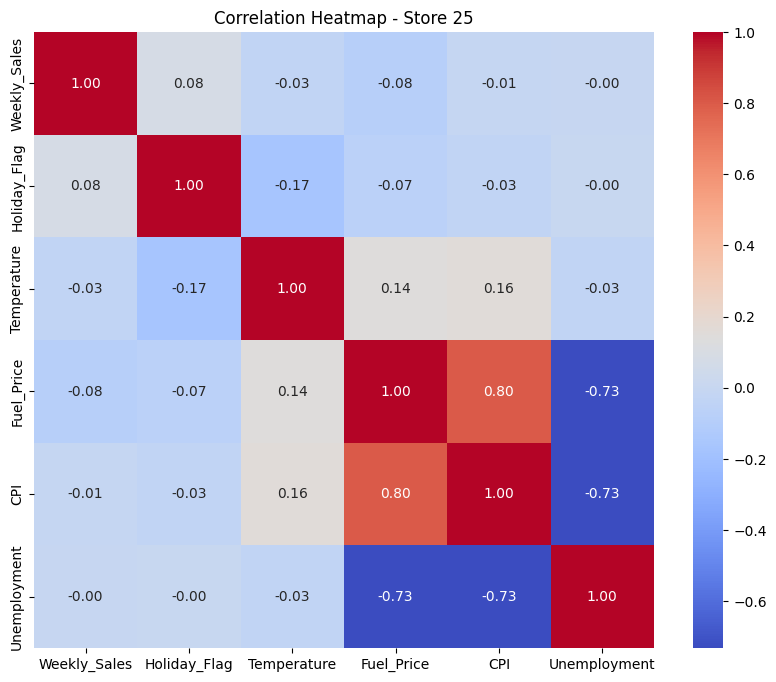

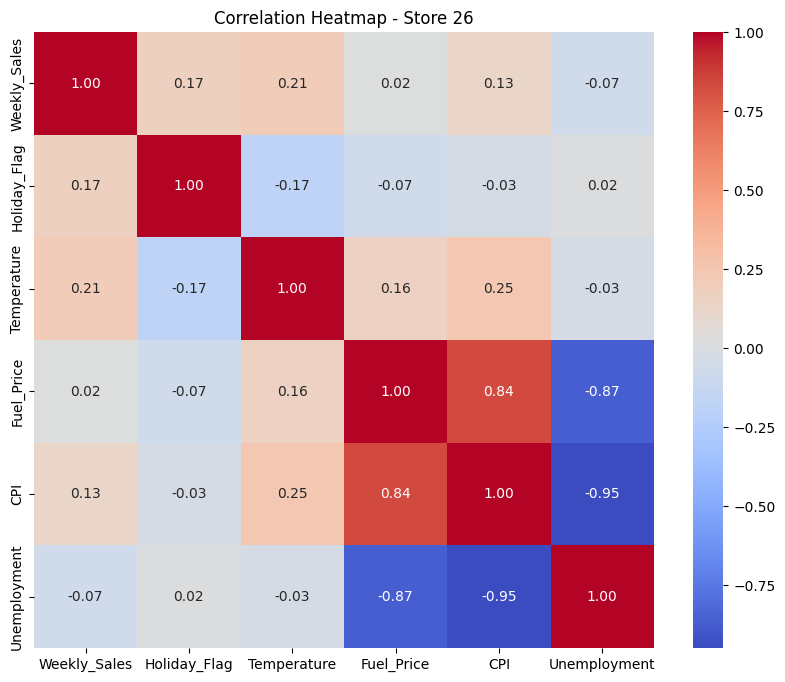

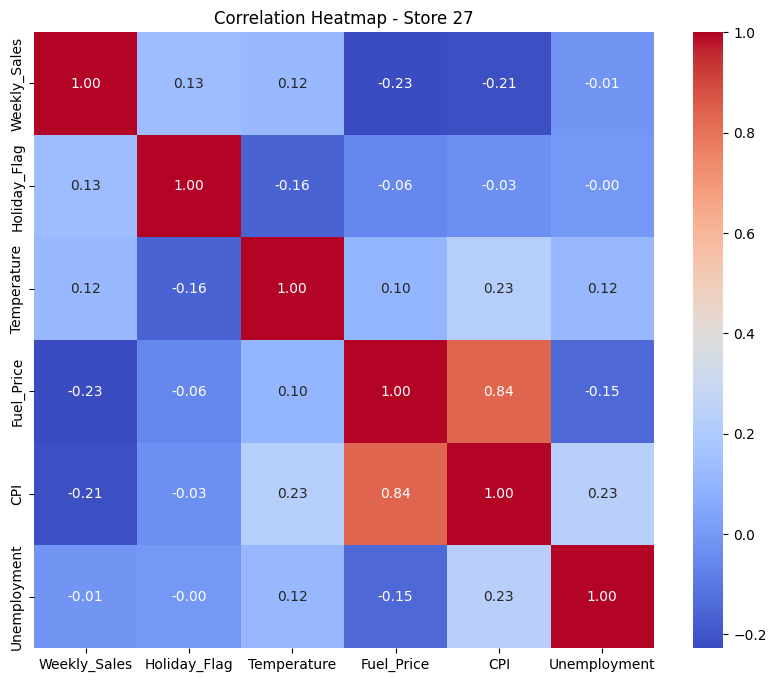

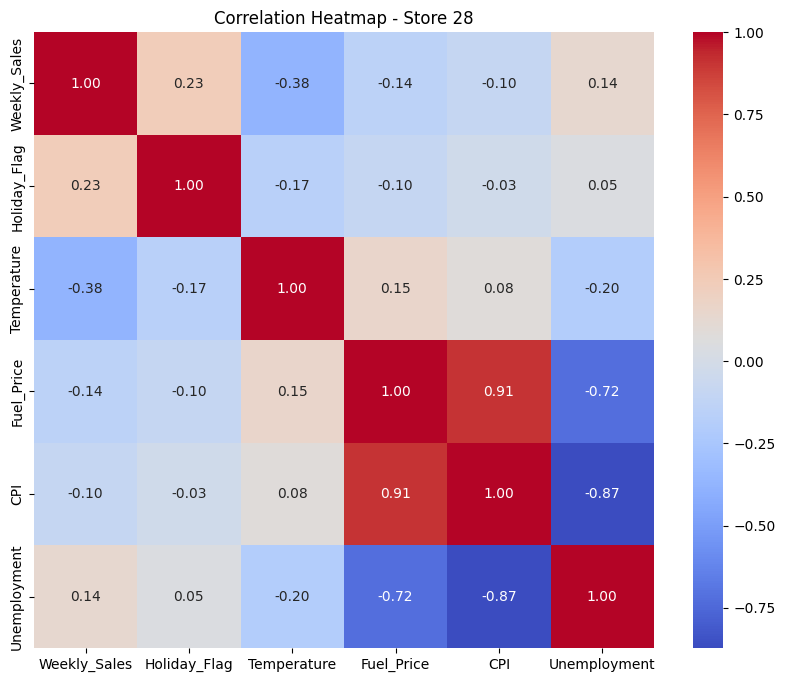

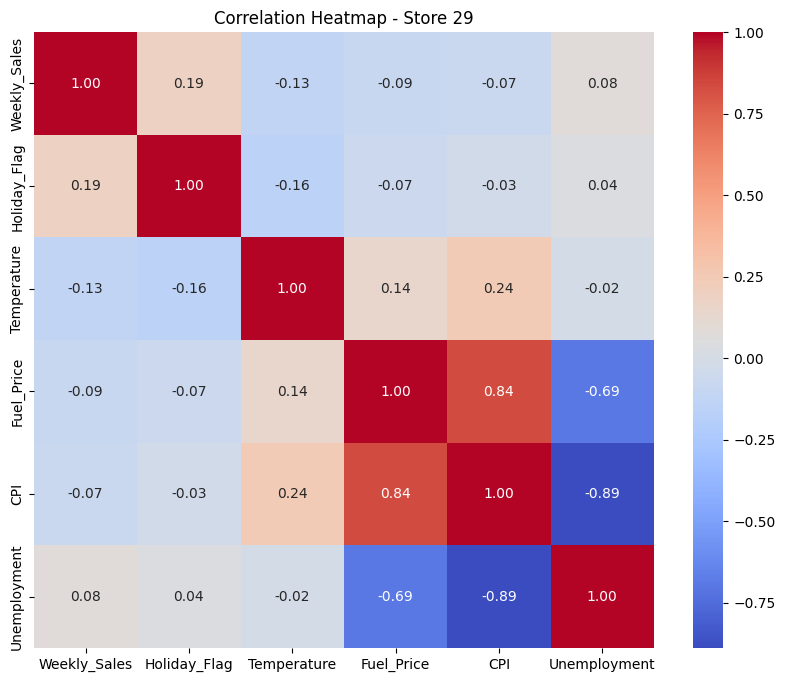

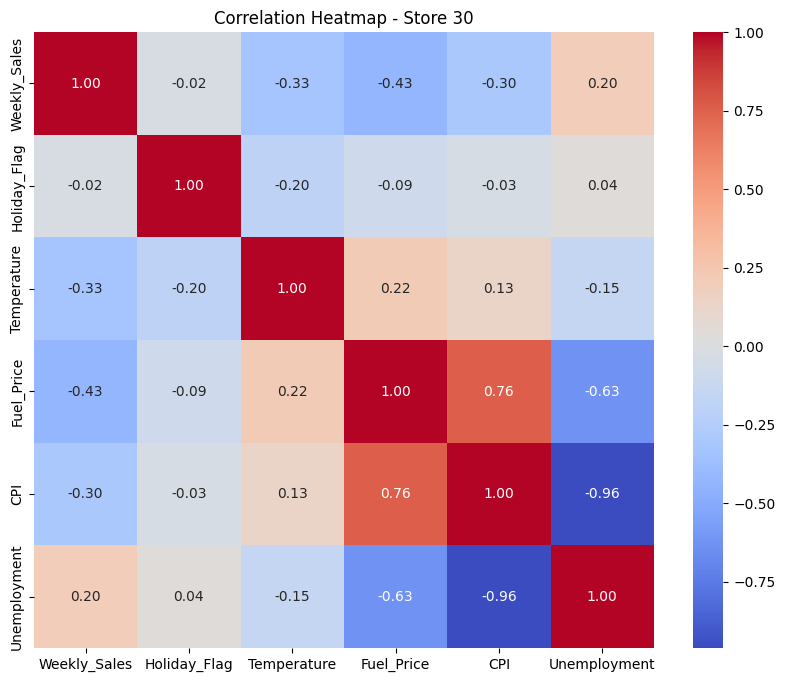

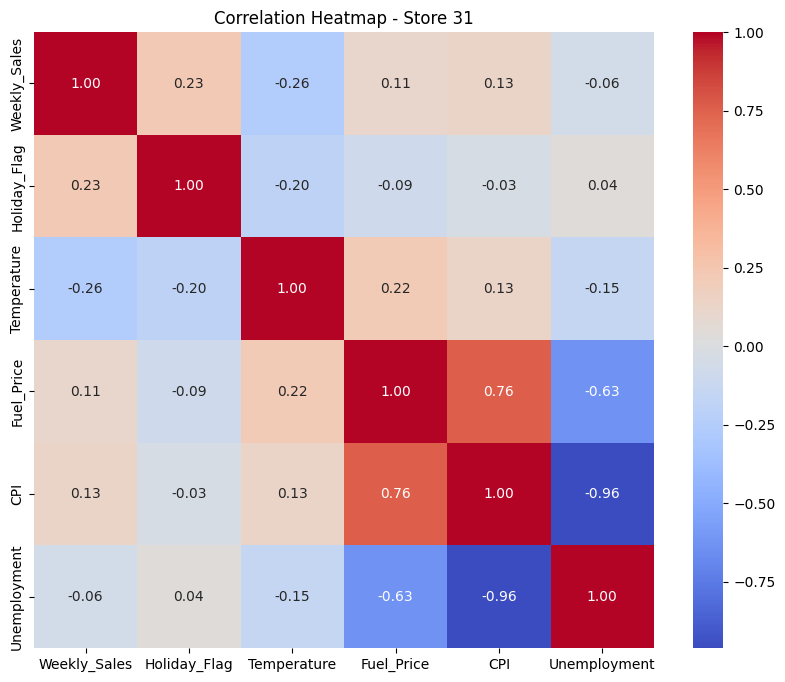

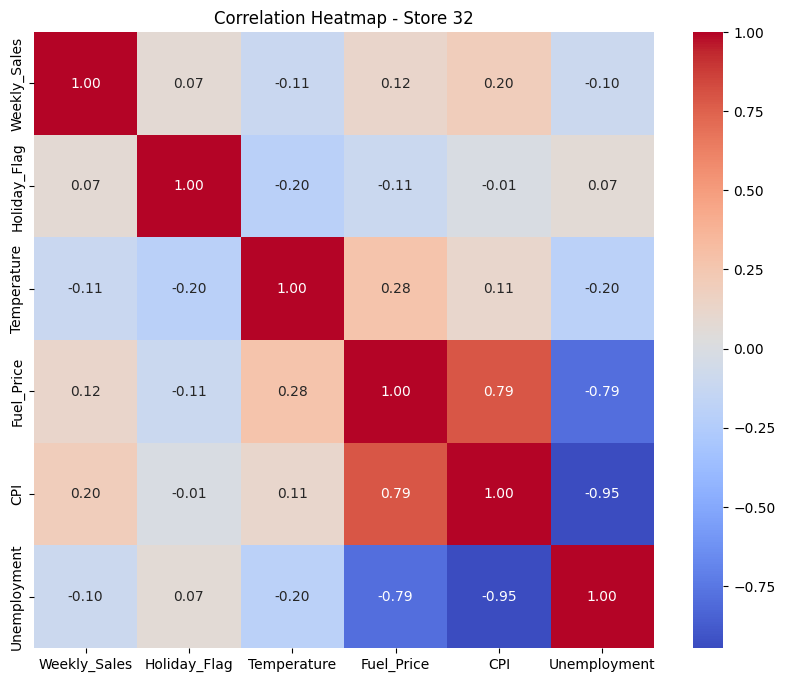

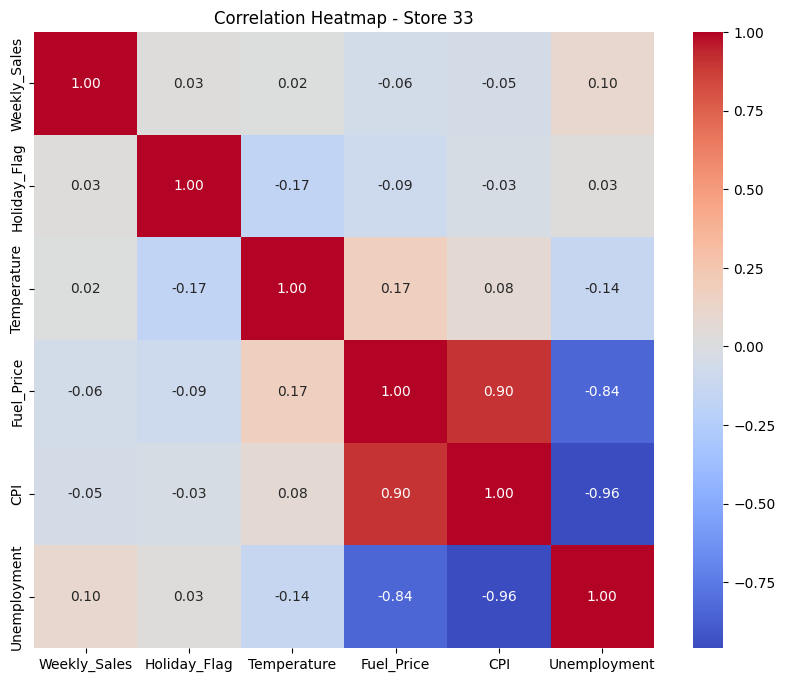

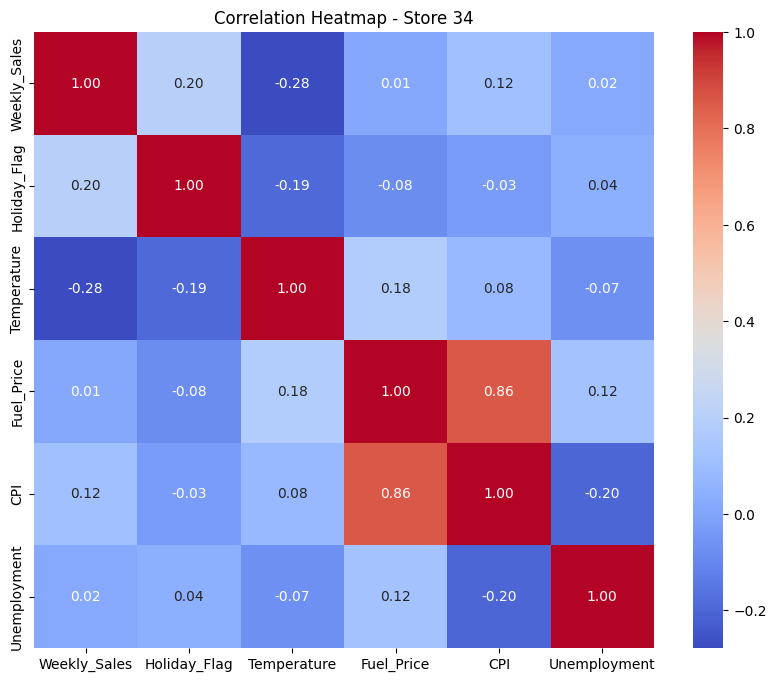

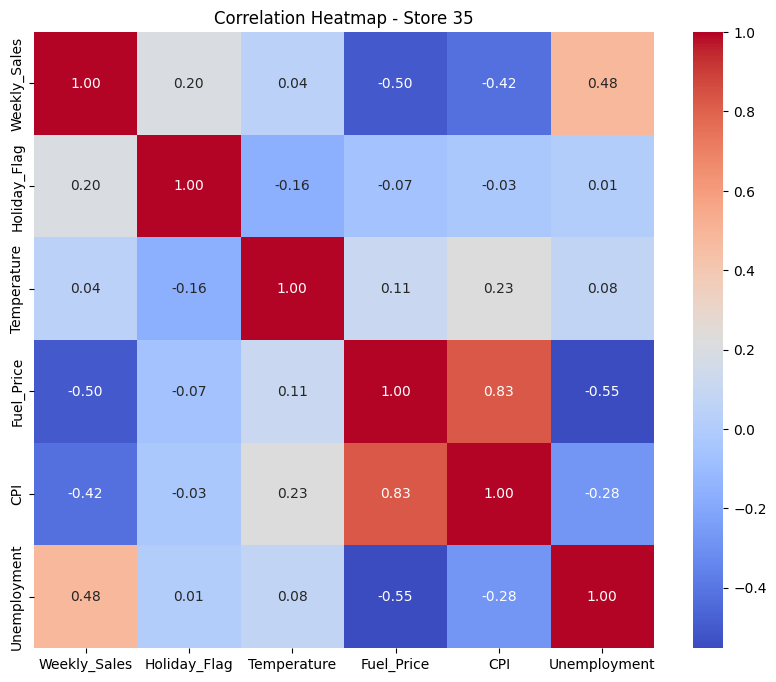

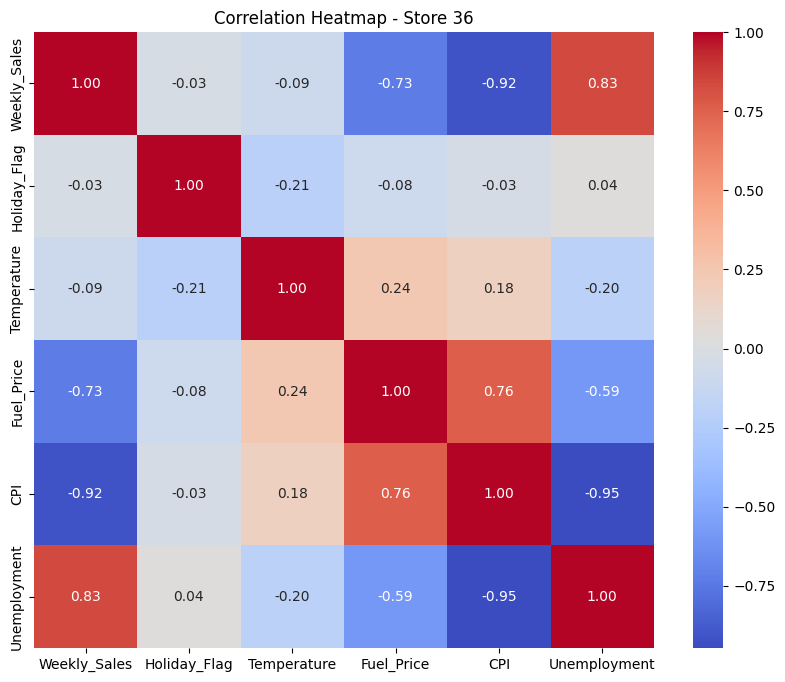

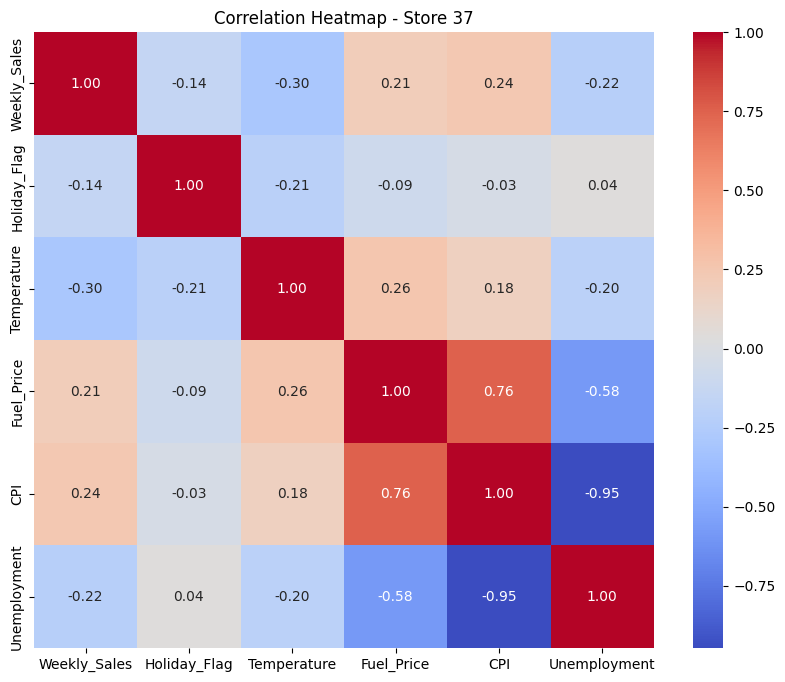

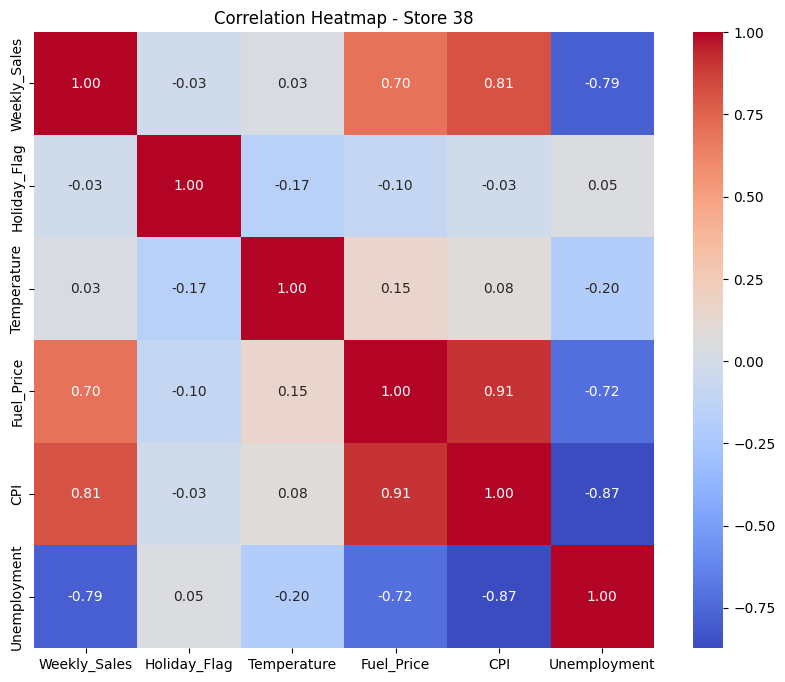

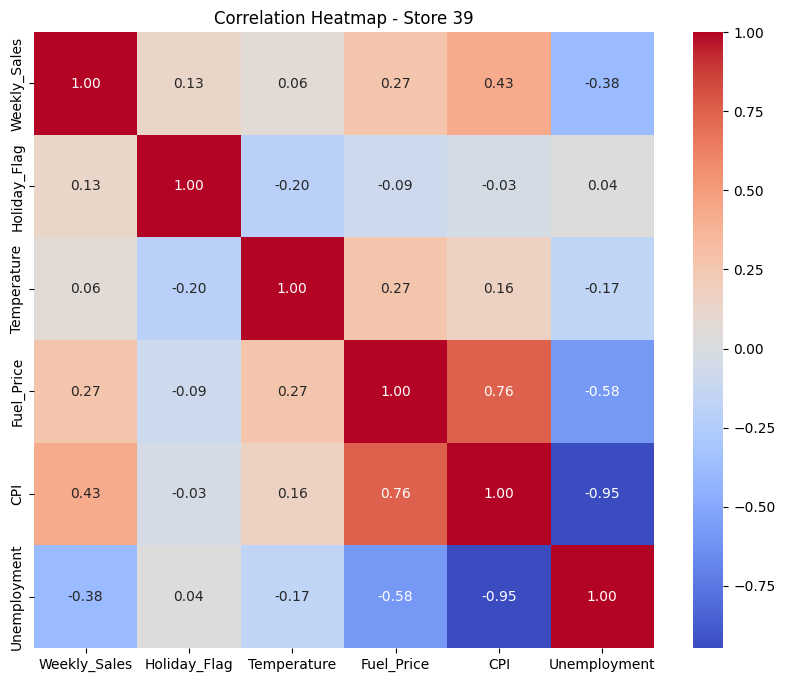

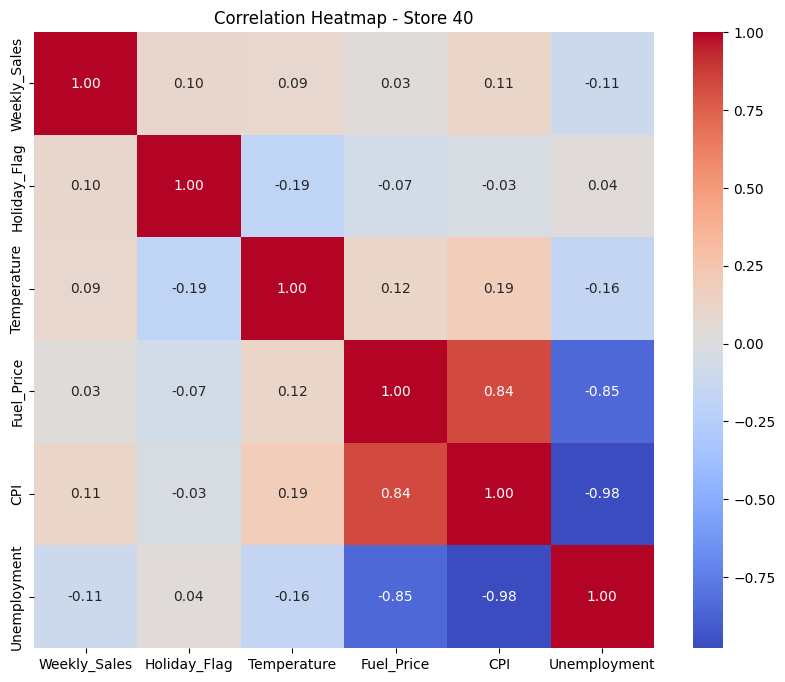

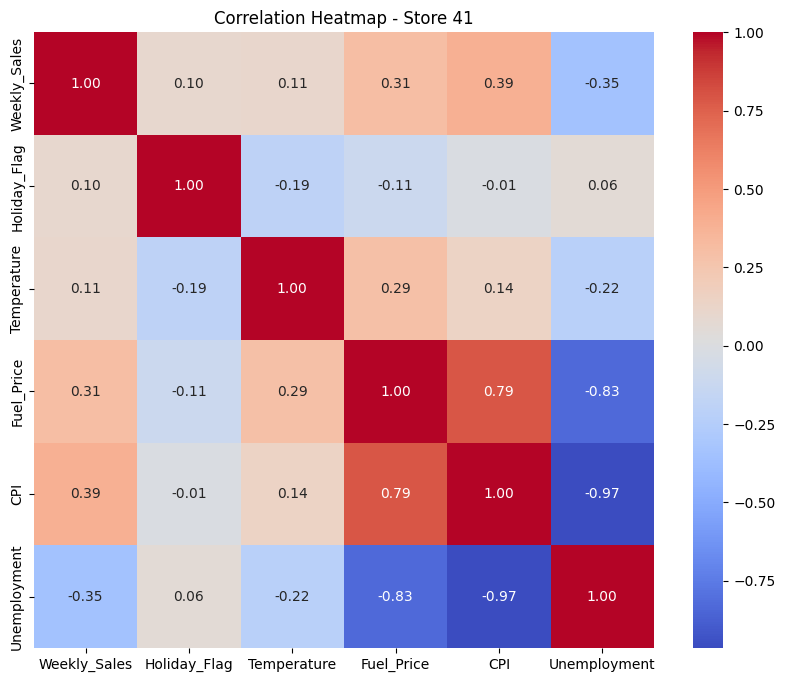

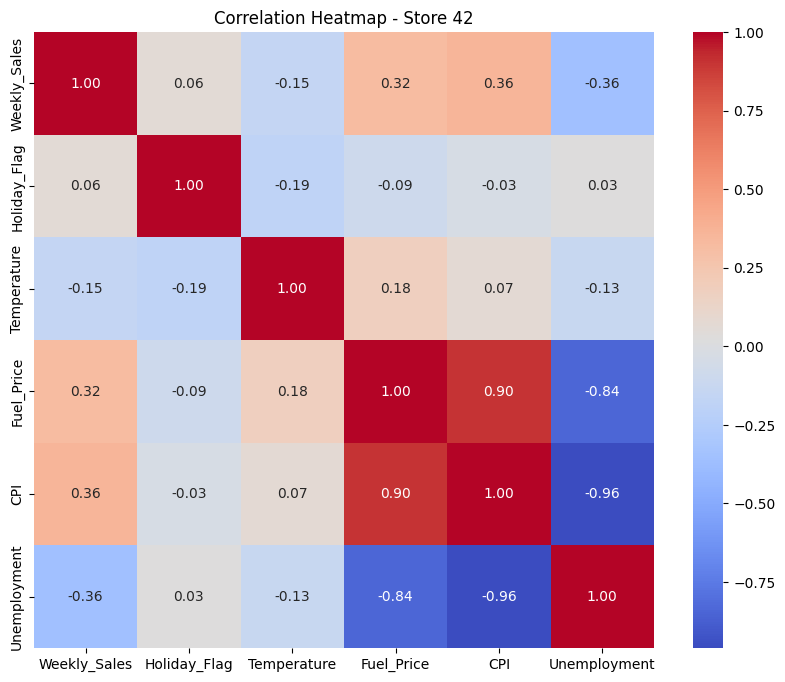

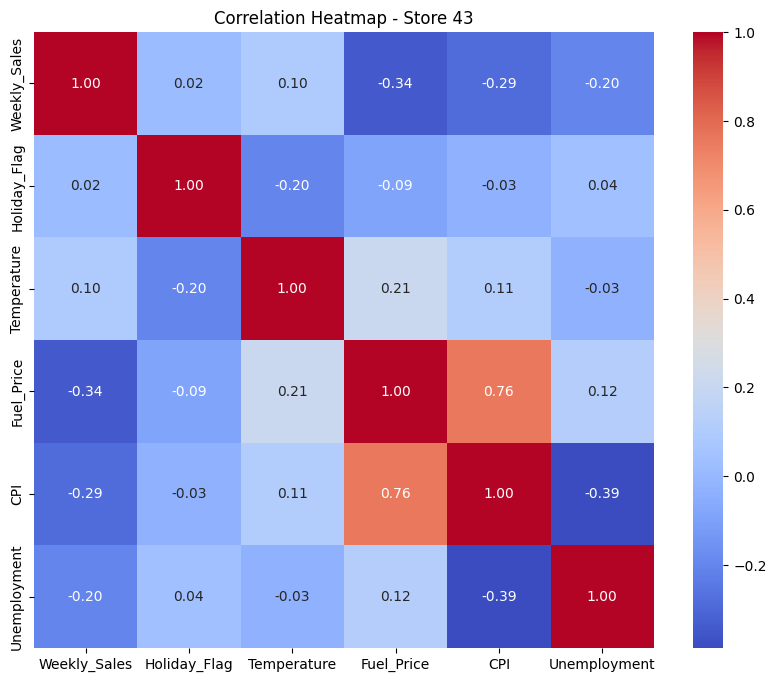

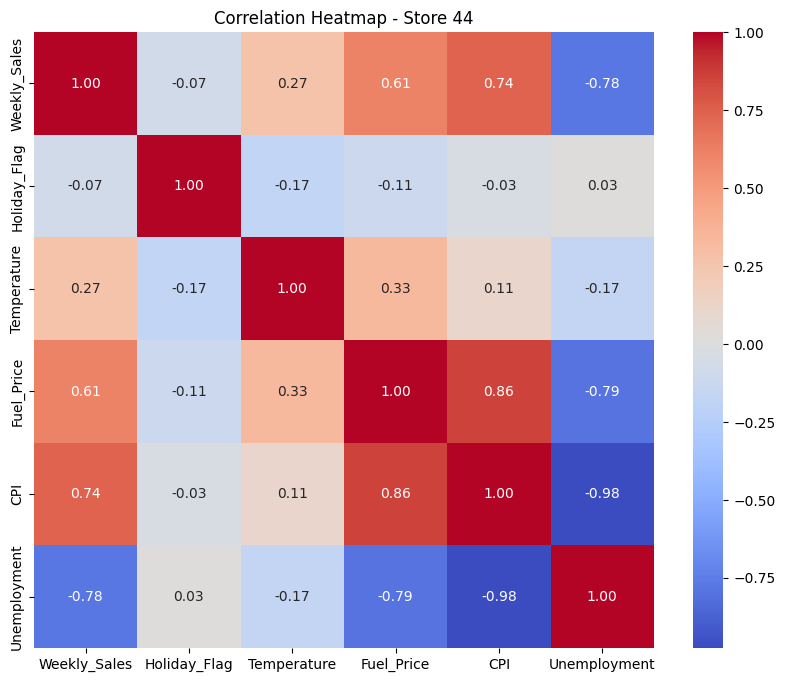

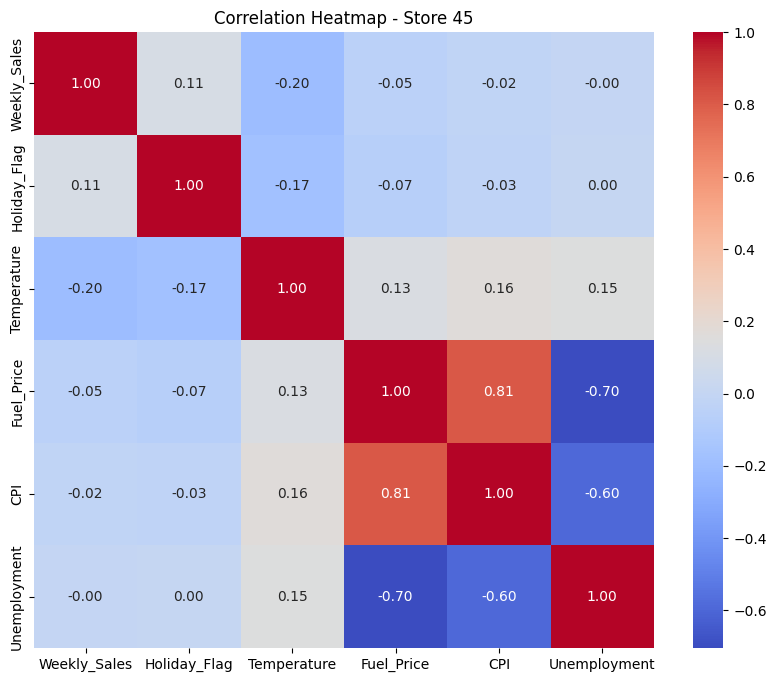

In [6]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix for each store
for store_number, data in store_data.items():
    corr_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Heatmap - Store {store_number}")
    plt.show()


In [8]:
import json

# Create a dictionary to store all PCA results in the desired format
pca_results_json = {}

# Loop through each store and save PCA results in the desired format
for store_number, pca_result_df in pca_results.items():
    # Convert the PCA results dataframe to a list of dictionaries
    pca_list = pca_result_df.to_dict(orient='records')

    # Add the list of dictionaries to the main dictionary with the key "Store_X"
    pca_results_json[f"Store_{store_number}"] = pca_list

# Convert the main dictionary to a JSON-formatted string
json_data = json.dumps(pca_results_json, indent=4)

# Specify the file path to save the JSON data
json_file_path = "pca_results.json"

# Save the JSON data to a file
with open(json_file_path, 'w') as json_file:
    json_file.write(json_data)

print("PCA results have been successfully saved to", json_file_path)


PCA results have been successfully saved to pca_results.json
